# Laboratory exercise 4

## Warm-Up Mode (2 points)

**Task Description**  
Using the given dataset, develop and implement **3** different neural networks to predict the **air quality level**. Each network should differ in the following ways:  

- **layer configurations** - use different numbers and types of layers;
- **activation functions** - try different activation functions;
- **neurons per layer** - experiment with different numbers of neurons in each layer; and
- **number of layers** - build networks with varying depths.

After developing the models, evaluate and compare the performance of all **3** approaches.

**About the Dataset**  
This dataset focuses on air quality assessment across various regions. The dataset contains 5,000 samples and captures critical environmental and demographic factors that influence pollution levels.

**Features**:  
- **Temperature (°C)**: Average temperature of the region.  
- **Humidity (%)**: Relative humidity recorded in the region.  
- **PM2.5 Concentration (µg/m³)**: Levels of fine particulate matter.  
- **PM10 Concentration (µg/m³)**: Levels of coarse particulate matter.  
- **NO2 Concentration (ppb)**: Nitrogen dioxide levels.  
- **SO2 Concentration (ppb)**: Sulfur dioxide levels.  
- **CO Concentration (ppm)**: Carbon monoxide levels.  
- **Proximity to Industrial Areas (km)**: Distance to the nearest industrial zone.  
- **Population Density (people/km²)**: Number of people per square kilometer in the region.  

**Target Variable**: **Air Quality**  
- **Good**: Clean air with low pollution levels.  
- **Moderate**: Acceptable air quality but with some pollutants present.  
- **Poor**: Noticeable pollution that may cause health issues for sensitive groups.  
- **Hazardous**: Highly polluted air posing serious health risks to the population.  

**Imports**

In [25]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

**Dataset**

In [5]:
df = pd.read_csv('./sample_data/pollution_dataset.csv')
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


**Splitting Features**

In [6]:
X = df.drop(columns=['Air Quality'])
y = df['Air Quality']

**Encoding**

The target (Air Quality) has text labels (e.g., "Good", "Moderate"). Machine learning models can’t work with text, so we convert these into numerical labels (e.g., 0, 1, 2, 3).

In [7]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

**Splitting**

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Scaling Features**

Neural networks perform better when input features are on a similar scale. Features like "Temperature" (measured in °C) and "Population Density" (people/km²) might have very different ranges, causing the model to focus more on one feature than others.

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Models**

Model 1

In [10]:
model_1 = Sequential([
  Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
  Dense(32, activation='relu'),
  Dropout(0.3),
  Dense(len(np.unique(y)), activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Model 2

In [12]:
model_2 = Sequential([
  Dense(128, activation='tanh', input_shape=(X_train.shape[1],)),
  Dense(64, activation='tanh'),
  Dense(32, activation='tanh'),
  Dense(16, activation='tanh'),
  Dense(len(np.unique(y)), activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model_2.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Model 3

In [14]:
model_3 = Sequential([
  Dense(256, activation='sigmoid', input_shape=(X_train.shape[1],)),
  Dense(len(np.unique(y)), activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model_3.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

**Training**

In [16]:
history_1 = model_1.fit(X_train, y_train, epochs=20, validation_split=0.2, batch_size=32, verbose=1)

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4950 - loss: 1.1267 - val_accuracy: 0.8450 - val_loss: 0.5065
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8121 - loss: 0.4930 - val_accuracy: 0.8938 - val_loss: 0.3102
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8742 - loss: 0.3411 - val_accuracy: 0.9150 - val_loss: 0.2442
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9025 - loss: 0.2628 - val_accuracy: 0.9125 - val_loss: 0.2152
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8969 - loss: 0.2549 - val_accuracy: 0.9212 - val_loss: 0.2051
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9308 - loss: 0.2028 - val_accuracy: 0.9312 - val_loss: 0.1919
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9215 - loss: 0.2054 - val_accuracy: 0.9287 - val_loss: 0.1833
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9278 - loss: 0.1882 - val_accuracy: 0.

In [17]:
history_2 = model_2.fit(X_train, y_train, epochs=20, validation_split=0.2, batch_size=32, verbose=1)

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7832 - loss: 0.6495 - val_accuracy: 0.9325 - val_loss: 0.2764
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9254 - loss: 0.2541 - val_accuracy: 0.9375 - val_loss: 0.2155
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9340 - loss: 0.2084 - val_accuracy: 0.9250 - val_loss: 0.2048
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9217 - loss: 0.2038 - val_accuracy: 0.9087 - val_loss: 0.2152
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9306 - loss: 0.1820 - val_accuracy: 0.9300 - val_loss: 0.1959
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9293 - loss: 0.1789 - val_accuracy: 0.9337 - val_loss: 0.1732
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9452 - loss: 0.1549 - val_accuracy: 0.8925 - val_loss: 0.2498
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9367 - loss: 0.1666 - val_accuracy: 0.

In [18]:
history_3 = model_3.fit(X_train, y_train, epochs=20, validation_split=0.2, batch_size=32, verbose=1)

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3938 - loss: 1.2825 - val_accuracy: 0.5000 - val_loss: 1.1034
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4810 - loss: 1.0547 - val_accuracy: 0.5437 - val_loss: 0.9591
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5877 - loss: 0.9233 - val_accuracy: 0.6600 - val_loss: 0.8632
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6737 - loss: 0.8334 - val_accuracy: 0.7150 - val_loss: 0.7844
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7264 - loss: 0.7714 - val_accuracy: 0.7237 - val_loss: 0.7258
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7503 - loss: 0.7137 - val_accuracy: 0.7775 - val_loss: 0.6781
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7815 - loss: 0.6603 - val_accuracy: 0.7487 - val_loss: 0.6469
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7893 - loss: 0.6258 - val_accuracy: 0.

**Comparison**

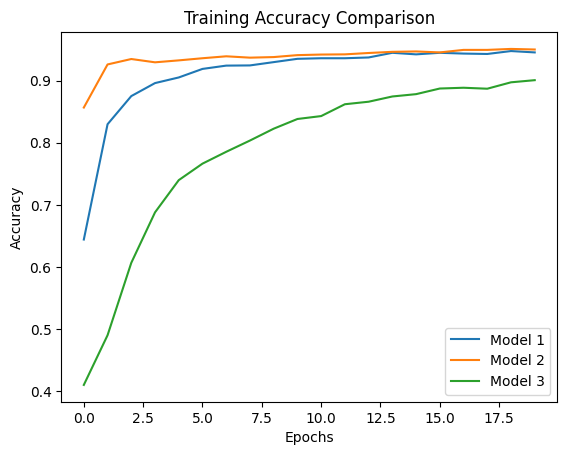

In [23]:
plt.plot(history_1.history['accuracy'], label='Model 1')
plt.plot(history_2.history['accuracy'], label='Model 2')
plt.plot(history_3.history['accuracy'], label='Model 3')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Comparison')
plt.show()

In [27]:
y_pred_1 = model_1.predict(X_test)
y_pred_2 = model_2.predict(X_test)
y_pred_3 = model_3.predict(X_test)

y_pred_1_classes = np.argmax(y_pred_1, axis=1)
y_pred_2_classes = np.argmax(y_pred_2, axis=1)
y_pred_3_classes = np.argmax(y_pred_3, axis=1)

accuracy_1 = accuracy_score(y_test, y_pred_1_classes)
accuracy_2 = accuracy_score(y_test, y_pred_2_classes)
accuracy_3 = accuracy_score(y_test, y_pred_3_classes)

print(f"Model 1 - Accuracy: {accuracy_1 * 100:.2f}%")
print(f"Model 2 - Accuracy: {accuracy_2 * 100:.2f}%")
print(f"Model 3 - Accuracy: {accuracy_3 * 100:.2f}%")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Model 1 - Accuracy: 95.20%
Model 2 - Accuracy: 95.40%
Model 3 - Accuracy: 90.50%
